# EDA on Diabetes Dataset

## Upload Dataset

In [2]:
import pandas as pd
import os


file_path = '/content/drive/MyDrive/Python/EDA/DATASETS/diabetes_unclean.csv'

# Load dataset
df = pd.read_csv(file_path)
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Basic Info & Structure

In [3]:
# Shape and data types
print("Dataset Shape:", df.shape)
print("\nData Types:\n")
print(df.dtypes)

# Check for nulls or missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Info summary
print("\nData Info:\n")
df.info()

# Statistical summary (only for numeric columns)
print("\nStatistical Summary:\n")
print(df.describe(include='all'))


Dataset Shape: (1009, 14)

Data Types:

ID             int64
No_Pation      int64
Gender        object
AGE          float64
Urea         float64
Cr           float64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

Missing Values:

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr    

## Clean Standardize Text Data

In [4]:
# Check unique values for each column
for col in df.columns:
    print(f"\n{col}:", df[col].unique())



ID: [502 735 420 680 504 634 721 421 670 759 636 788  82 132 402 566 596 676
 729 742  64  97 126 390 458 470 494 564 696 106 138 315 650 678 699 703
 708 719 740 741 746 794 219 255 450 626 664 704 799 210 237 318 620 640
 668 701 174 276 345 482 630 789 348   7   9  10  42  47  71  72  83  88
  89  96  98  99 102 134 137 139 141 143 144 145 147 149 150 153 154 157
 161 165 166 171 180 181 182 186 190 197 435 472  85 710 429 702   4 189
 201 285 393 468 492 496 498 684 700 716 366 399 490 500 672 690 718 264
 464 466 686 688  16 705 709  19 123 476 682 706 754  68 342 712 715  12
  20  41  60  79  81 133 135 146 152 178  18  24 675  39 474 648  48 656
  57 658  69 662 714  87 231 505 654  61 127 228 674 744  58 108 198 357
 588 666 698 753 110 113 119 122 452 652 660 673 162 168 580 694 790 140
 375 426 453 534 612 692 717 725 777  67 109 351 552 685 750  31 129 173
 176 179 183 185 195 316 646 187 188 191 194 200 203 411 520 622 758 206
 600  76  86 209 212 215 218 221 224 227 438 4

In [5]:
# Convert binary columns to 0/1
binary_map = {'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Male': 1, 'Female': 0}

df_cleaned = df.copy()
df_cleaned = df_cleaned.replace(binary_map)

# Check again
df_cleaned.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Visualize Class Distribution

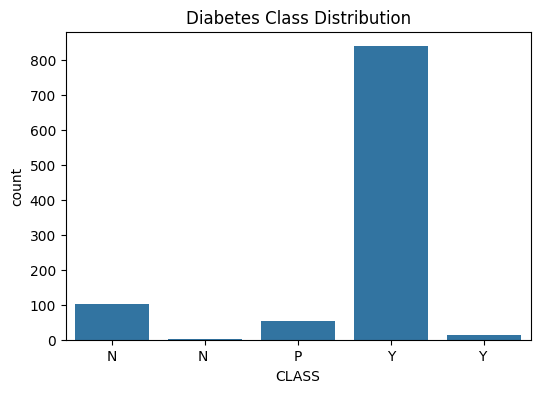

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df)
plt.title("Diabetes Class Distribution")
plt.show()


## Feature Distributions

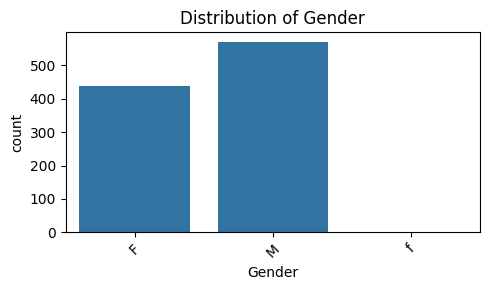

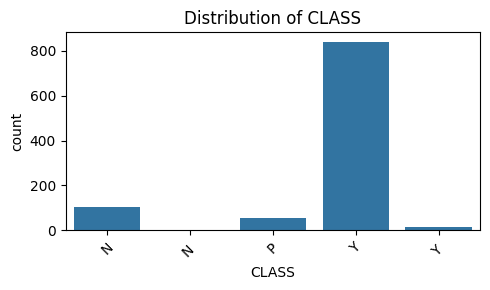

In [11]:
# Bar plots for categorical features
cat_cols = df.columns[df.dtypes == 'object']

for col in cat_cols:
    if col != 'class':
        plt.figure(figsize=(5,3))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Correlation Matrix (for numeric features)

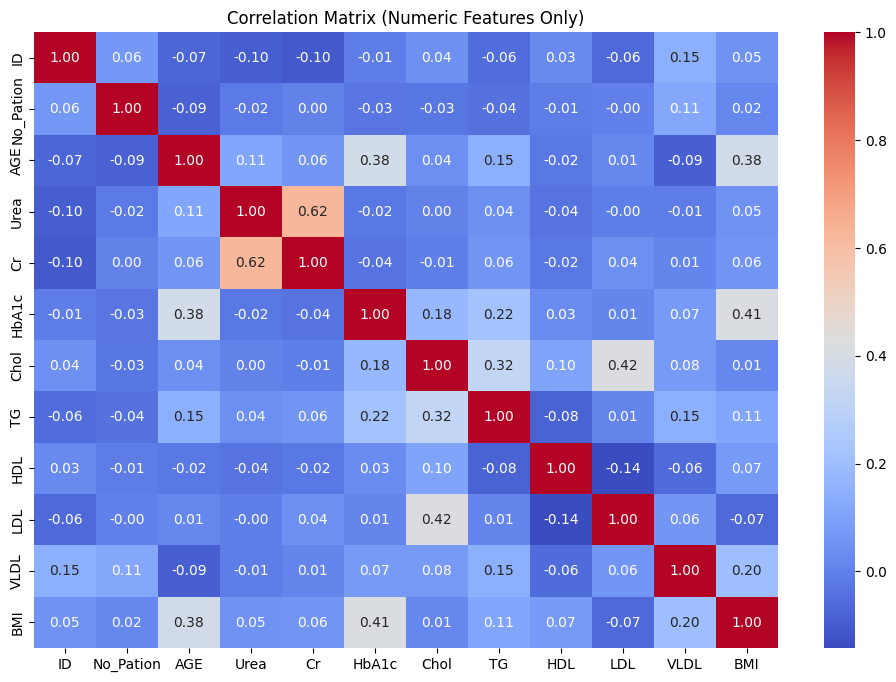

In [13]:
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


## Check for Duplicates or Outliers

Number of duplicate rows: 0


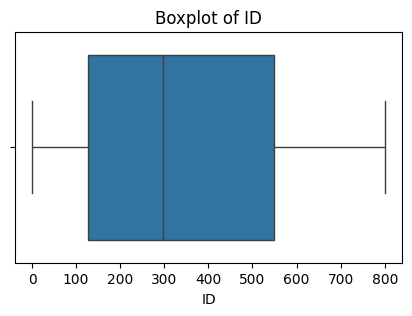

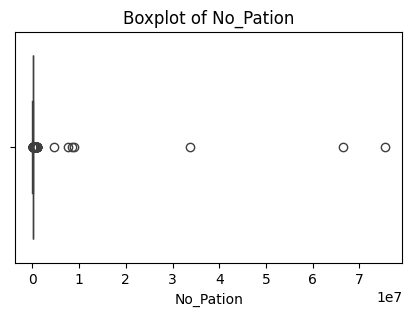

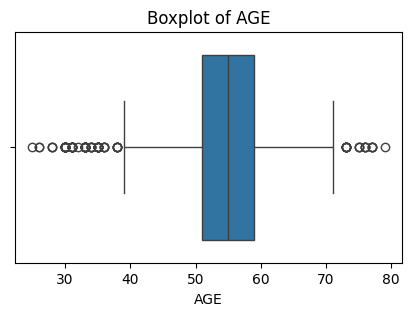

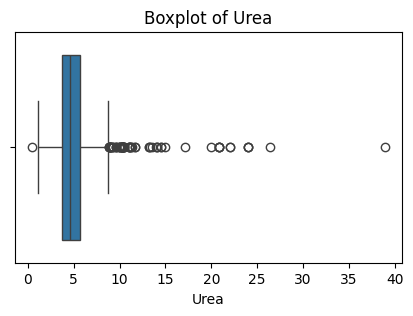

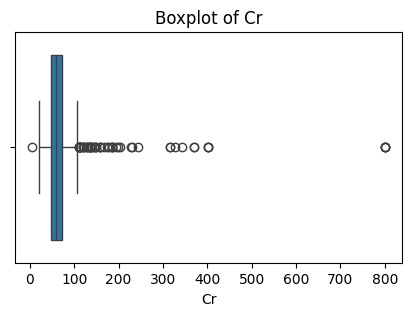

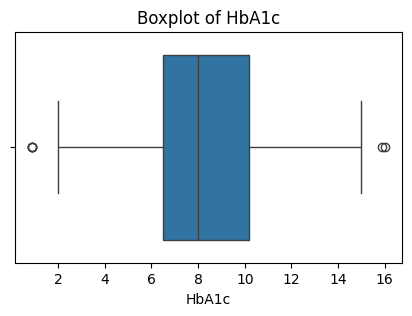

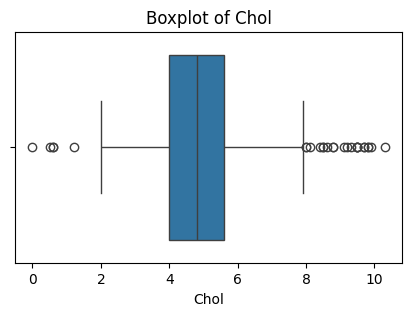

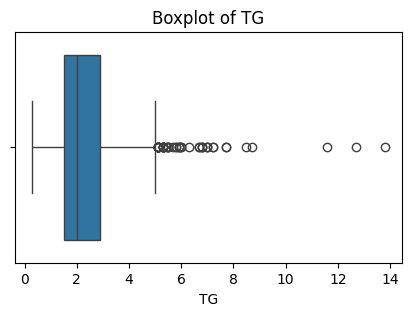

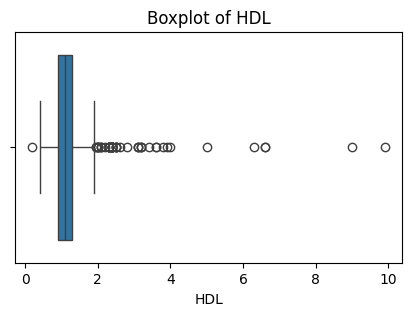

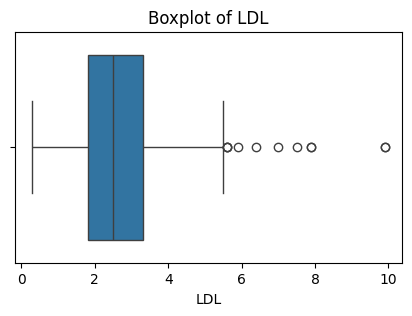

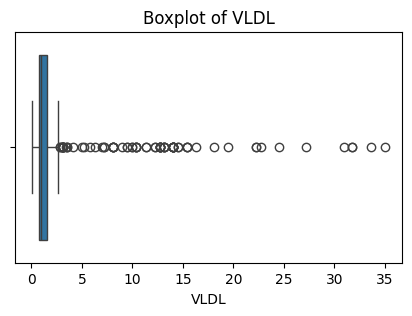

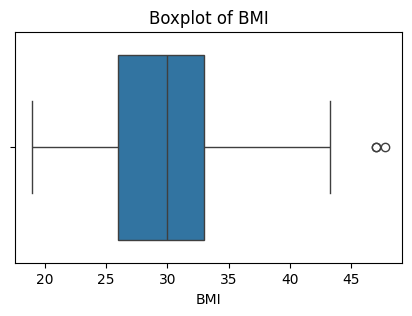

In [15]:
# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Example: Boxplot for outliers
num_cols = df_cleaned.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## Countplot of Categorical Features

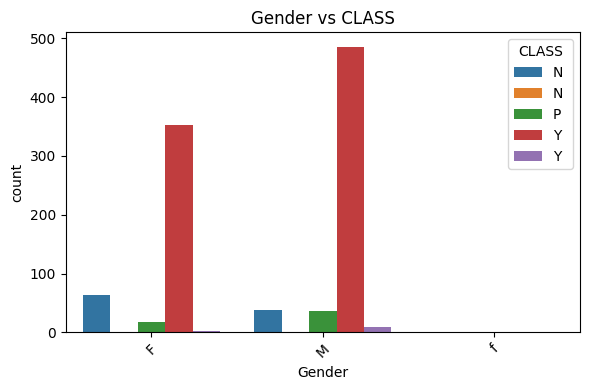

In [18]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if col != 'CLASS':
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue='CLASS')
        plt.title(f'{col} vs CLASS')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Thank You